# Introduction to AI: assignment 4 - SVM classifiers

Support vector machines have promoted one of the most radical advances in machine learning classification and prediction. In this assignment you are going to explore several types of SVMs to analyze the various types of mononuclear cells in the blood sample of a healthy person. Easier said than done!

### Motivation
For decades, gene expression measurements had been done by averaging over a whole population of cells, thus revealing average activities but hiding minority behaviors. Single-cell transcriptomics (SCT) is a recent technique able to examine the gene expression level of individual cells in a given population by simultaneously measuring the messenger RNA (mRNA) concentration of hundreds to thousands of genes. For each of the thousands of cells analyzed, SCT tells how frequently some hundreds of its genes get transcribed in mRNA, thus revealing which chemical pathways are active and which others are dormant or inactive. Such very detailed pedigree can be used for example to distinguish different types of cells in a blood sample: **is it possible to tell apart different types of cells in a blood sample using SCT?**

### Resources
The database has been adapted from an open source data collection by 10x Genomics <sup>1</sup>: it is a sample of peripheral blood mononuclear cells (PBMC) from a healthy patient. PBMCs consist of lymphocytes and monocytes, and are thus essential for research in immunology, especially in autoimmune studies and vaccine development. The dataset consists of 2638 cells for which the expression of 207 genes has been monitored. The dataset also includes a column ("louvain") where the cell type is specified.

### Aim
Our aim is to correctly classify the different types of cells.

<sup>1</sup>Download link: [PBMC3k](https://support.10xgenomics.com/single-cell-gene-expression/datasets/1.1.0/pbmc3k?).

## A. Dimensional reduction and preprocessing

Each cell is described by the relative expression of 207 of its genes, which makes for a 207-dimensional representation of this dataset. First of all, we want to see whether a smart 2-dimensional representation can suffice to have a pretty good idea of how the data is structured. In the following, we will apply the UMAP<sup>2</sup> method. 

<sup>2</sup> Leland McInnes, John Healy, James Melville, *UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction* (2018) [arxiv.org/abs/1802.03426](arxiv.org/abs/1802.03426)

Import pandas, read the .csv dataset and display it 

In [1]:
import pandas as pd

df = pd.read_csv('PBMC.csv')
df

,index,TNFRSF4,SRM,TNFRSF1B,EFHD2,C1QA,C1QB,STMN1,MARCKSL1,SMAP2,...,LGALS2,ADSL,TTC38,TYMP,ATP5O,TTC3,SUMO3,S100B,PRMT2,louvain
0,AAACATACAACCAC-1,-0.171470,-0.341788,-0.453393,1.745100,-0.157293,-0.122734,-0.256962,-0.441868,-0.451829,...,-0.617735,-0.341052,-0.223335,-0.887273,-0.861572,2.512883,-0.521229,-0.209095,-0.531203,CD4 T cells
1,AAACATTGAGCTAC-1,-0.214582,-0.541914,0.925518,-0.972209,-0.639420,-0.517008,-0.294419,-0.679339,-0.696321,...,-1.025107,-0.531692,-0.120057,-1.777368,-0.046343,-0.455660,-0.857164,-0.313146,-0.596654,B cells
2,AAACATTGATCAGC-1,-0.376887,-0.500798,1.908033,-0.510691,-0.201678,-0.138107,-0.299936,-0.570379,-0.466251,...,-0.447958,-0.383159,-0.172312,-0.766853,-0.950572,-0.404399,-0.590721,-0.170876,1.379000,CD4 T cells
3,AAACCGTGCTTCCG-1,-0.285241,-0.416752,2.180138,1.701055,-0.144719,-0.100516,-0.278529,-0.496501,-0.440840,...,1.463980,-0.350086,-0.202351,1.451533,0.710437,-0.376748,1.631685,-0.179120,-0.505670,CD14+ Monocytes
4,AAACCGTGTATGCG-1,-0.256483,-0.283112,-0.111873,-0.206740,0.177299,0.162829,-0.253518,-0.337912,-0.277540,...,-0.216761,-0.222760,-0.271324,-0.154098,-0.674416,-0.311472,-0.310096,-0.109614,-0.461946,NK cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,TTTCGAACTCTCAT-1,-0.290368,-0.478076,-0.587775,-0.640462,-0.308452,-0.235403,-0.289382,-0.572111,-0.524253,...,1.850712,-0.413668,-0.169238,1.612636,0.959860,-0.408171,1.232168,-0.216714,-0.529870,CD14+ Monocytes
2634,TTTCTACTGAGGCA-1,-0.386343,1.803535,-0.524727,-0.557999,-0.256959,-0.182845,-0.305116,-0.599997,-0.494103,...,-0.490024,-0.405567,-0.159540,-0.864378,-0.988453,-0.416446,-0.630103,-0.181736,-0.502022,B cells
2635,TTTCTACTTCCTCG-1,-0.207090,-0.307756,-0.283819,-0.378786,0.009685,0.019069,-0.253908,-0.386385,-0.365124,...,-0.424633,-0.281189,-0.248687,-0.528220,1.840366,3.065863,2.264174,-0.161064,2.041497,B cells
2636,TTTGCATGAGAGGC-1,-0.190328,-0.251677,-0.161542,3.060144,0.135524,0.121406,-0.243051,-0.321487,-0.301530,...,-0.323972,-0.230759,-0.276778,1.778919,-0.681335,-0.306937,-0.325824,-0.135213,-0.482111,B cells


The last column of the dataset contains the correct classification for each one of the cells. Print a statistics on their types

In [2]:
df.louvain.value_counts()

CD4 T cells          1144
CD14+ Monocytes       480
B cells               342
CD8 T cells           316
NK cells              154
FCGR3A+ Monocytes     150
Dendritic cells        37
Megakaryocytes         15
Name: louvain, dtype: int64

Before using UMAP, let's scale the data so that the ranges of each feature look similar (this is always a very useful thing to do when using any machine learning algorithm!). Create a matrix $\mathbf{X}$ containing all input features of each data point, then use the `fit_transform` method of the `StandardScaler` class in `sklearn.preprocessing` in order to obtain a new scaled matrix $\mathbf{X_{s}}$.

In [4]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

feats = list(df.columns)[1:-1]
reducer = umap.UMAP()
data_v = df[
    feats
].values
scaled_data = StandardScaler().fit_transform(data_v)
scaled_data

array([[-0.17150212, -0.34185289, -0.45347854, ..., -0.52132775,
        -0.20921937, -0.53130402],
       [-0.21462303, -0.54201654,  0.92569358, ..., -0.8573256 ,
        -0.31336969, -0.59676742],
       [-0.37695915, -0.50089359,  1.90839485, ..., -0.59083238,
        -0.1709641 ,  1.37926121],
       ...,
       [-0.20712889, -0.30781442, -0.28387305, ...,  2.26460117,
        -0.16114254,  2.0418839 ],
       [-0.19036457, -0.25172502, -0.16157216, ..., -0.32588559,
        -0.13526654, -0.48220245],
       [-0.33385265, -0.39524734, -0.2650213 , ..., -0.43696236,
        -0.130376  , -0.47142718]])

Now let's use UMAP: import the `umap` package and define an instance of the `UMAP` class. Use its `fit_transform` method for generating a 2D embedding.

In [5]:
embedding = reducer.fit_transform(data_v)
embedding.shape

(2638, 2)

Represent the data points in the new 2D embedding space: make a scatterplot with `matplotlib`. Color each type of cell differently and show an appropriate legend. Does it look like a viable representation? Is the resulting 207->2 dimensionality reduction appropriate for our purposes?

['CD4 T cells', 'FCGR3A+ Monocytes', 'CD8 T cells', 'Megakaryocytes', 'NK cells', 'B cells', 'CD14+ Monocytes', 'Dendritic cells']


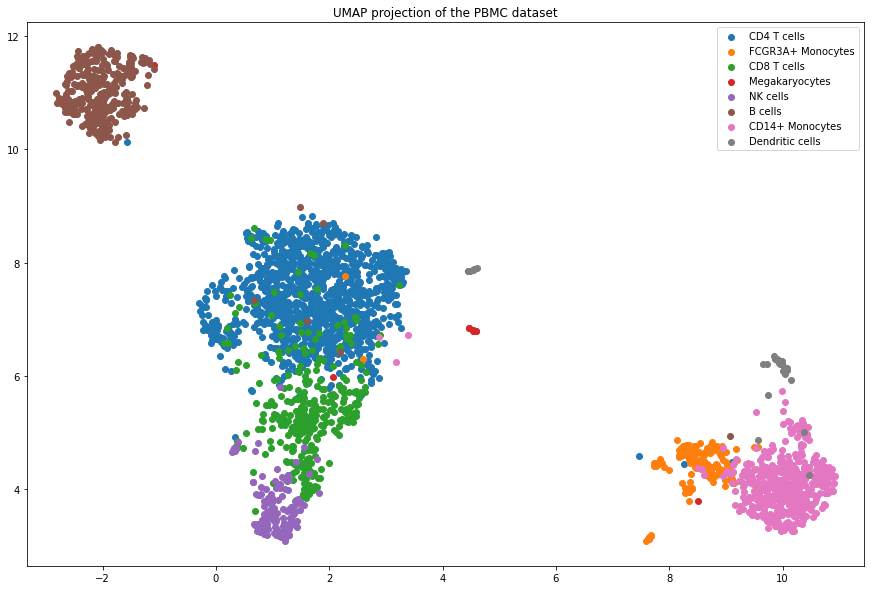

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15, 10]

l = list(set(df.louvain.values))
print(l)
for x in l:
    il = df[df.louvain == x].index
    plt.scatter(
        embedding[il, 0],
        embedding[il, 1]
    )
    #c=[sns.color_palette()[x] for x in df.louvain.map({l[i]:i for i in range(len(l))})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the PBMC dataset')
plt.legend(l)
plt.rcParams["figure.figsize"] = (20,15)

### 2. Hard margin linear SVM 

Some pairs of clusters can be easily told apart: look for example at `NK cells` and `B cells`. What would be a good hard threshold for distinguishing between them?

Stack the feature matrices in $\mathbf{X}$ and outputs in $\mathbf{y}$ for cell types `NK cells` and `B cells`

In [7]:
import numpy as np

il_0 = df[df.louvain == 'NK cells'].index
il_1 = df[df.louvain == 'B cells'].index
X_0 = np.array(embedding[il_0, :])
X_1 = np.array(embedding[il_1, :])
y_0 = np.array([0]*len(il_0)).reshape(-1,1)
y_1 = np.array([1]*len(il_1)).reshape(-1,1)
y = np.vstack((y_0[:],y_1[:]))
X = np.vstack((X_0,X_1))

Import the `svm` model from `sklearn`

In [8]:
from sklearn import svm

Define hard margin linear SVM model. For now, we will only need a `linear` kernel. All SVM methods are actually soft-margin: this means we have to force the method to reproduce a hard margin SVM by tweaking the `C` parameter. What would be a good value for `C` in this case? 

In [9]:
svm_hlin = svm.SVC(kernel='linear',C=1e10)

Fit on training data, evaluate the corresponding predictions, calculate and print the accuracy (you can use the `accuracy_score` function from `sklearn.metrics`)

In [10]:
svm_hlin.fit(X, np.ravel(y))
y_pred_svm=svm_hlin.predict(X)
from sklearn.metrics import accuracy_score
acc_svm_hlin = accuracy_score(y,y_pred_svm)
print('Accuracy of hard margin linear SVM: {}%'.format(acc_svm_hlin*100))

Accuracy of hard margin linear SVM: 100.0%


By using the method `decision_function` from the SVM model and pyplot’s command `contour`, draw the border line between the two predicted classes and 2 dashed lines corresponding to the 2 borders of the margin. 

Draw the scatter plot with the features on top of the contours and indicate with circles which data points are sup- port vectors. The support vectors can be found in the attribute `support_vectors_` of the fitted SVM model.

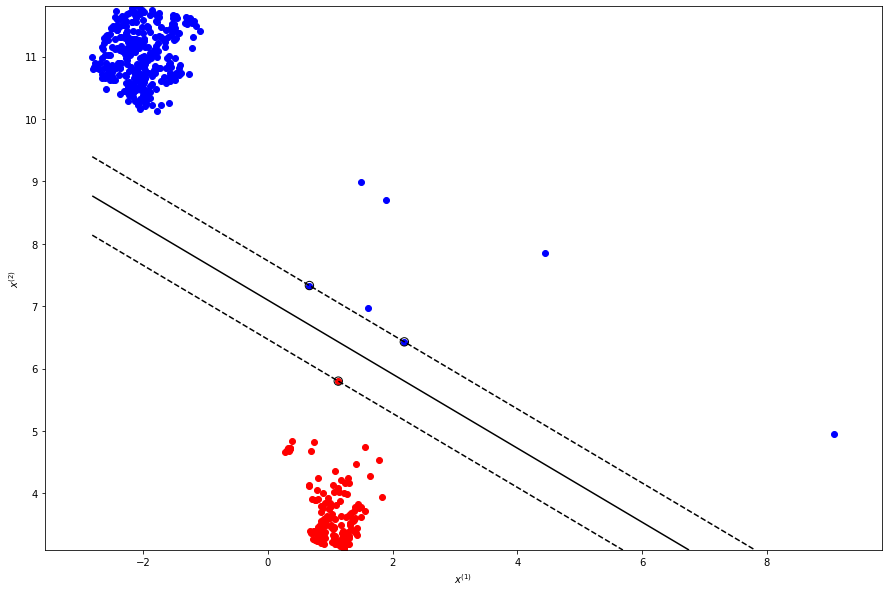

In [11]:
x_1_min = np.min(X[:, 0])
x_1_max = np.max(X[:, 0])
x_2_min = np.min(X[:, 1])
x_2_max = np.max(X[:, 1])

x_1_grid, x_2_grid = np.meshgrid(np.linspace(x_1_min,x_1_max,200),np.linspace(x_2_min,x_2_max,200))
f = svm_hlin.decision_function(np.hstack((x_1_grid.reshape(-1,1),x_2_grid.reshape(-1,1))))

# Put the result into a color plot
matplotlib.rcParams['figure.figsize'] = [15, 10]
f = f.reshape(np.shape(x_1_grid))
plt.contour(x_1_grid, x_2_grid, f,colors=['k','k','k'],levels=[-1,0,1],linestyles=['--','-','--']);
plt.scatter(X[np.ravel(y==0),0],X[np.ravel(y==0),1],c='r',zorder=-1);
plt.scatter(X[np.ravel(y==1),0],X[np.ravel(y==1),1],c='b',zorder=-1);
plt.scatter(svm_hlin.support_vectors_[:,0],svm_hlin.support_vectors_[:,1],s=70,facecolors='none',edgecolors='k');
plt.xlabel('$x^{(1)}$');
plt.ylabel('$x^{(2)}$');
plt.gca().set_aspect('equal', 'datalim')

A hard margin SVM would not be suited for non-linearly separable clusters: even very slight deviations from linear separability can drastically compromise its predictiveness. Take for example the `FCGRA3+ Monocytes` and `CD8 T cells` and repeat the analysis. How is the accuracy? Is there any specific data point leading the predicted threshold? In this case, is the accuracy enough to conclude the quality of the training?

Accuracy of hard margin linear SVM: 99.57081545064378%


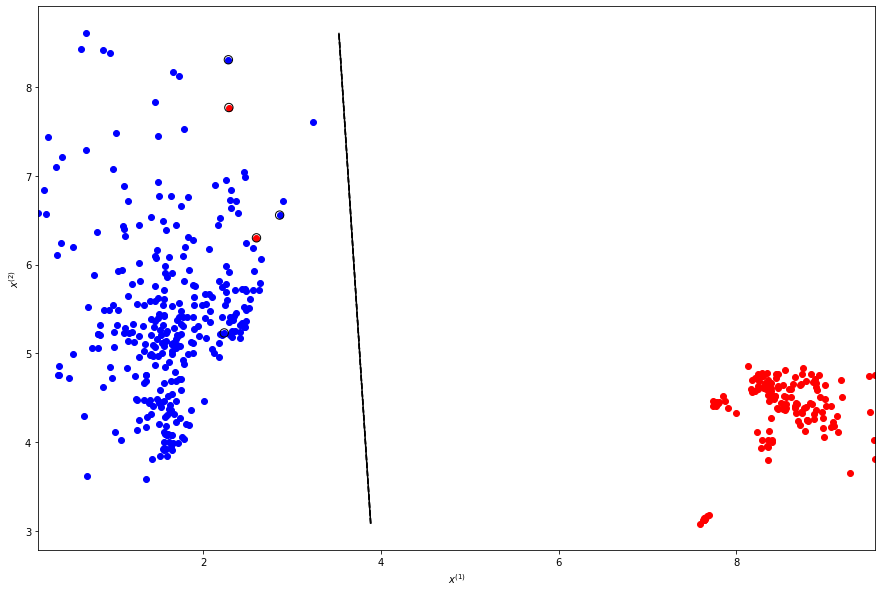

In [12]:
il_0 = df[df.louvain == 'FCGR3A+ Monocytes'].index
il_1 = df[df.louvain == 'CD8 T cells'].index
X_0 = np.array(embedding[il_0, :])
X_1 = np.array(embedding[il_1, :])
y_0 = np.array([0]*len(il_0)).reshape(-1,1)
y_1 = np.array([1]*len(il_1)).reshape(-1,1)
y = np.vstack((y_0[:],y_1[:]))
X = np.vstack((X_0,X_1))

svm_hlin = svm.SVC(kernel='linear',C=1e10)

svm_hlin.fit(X, np.ravel(y))
y_pred_svm=svm_hlin.predict(X)
from sklearn.metrics import accuracy_score
acc_svm_hlin = accuracy_score(y,y_pred_svm)
print('Accuracy of hard margin linear SVM: {}%'.format(acc_svm_hlin*100))

x_1_min = np.min(X[:, 0])
x_1_max = np.max(X[:, 0])
x_2_min = np.min(X[:, 1])
x_2_max = np.max(X[:, 1])

x_1_grid, x_2_grid = np.meshgrid(np.linspace(x_1_min,x_1_max,200),np.linspace(x_2_min,x_2_max,200))
f = svm_hlin.decision_function(np.hstack((x_1_grid.reshape(-1,1),x_2_grid.reshape(-1,1))))

# Put the result into a color plot
matplotlib.rcParams['figure.figsize'] = [15, 10]
f = f.reshape(np.shape(x_1_grid))
plt.contour(x_1_grid, x_2_grid, f,colors=['k','k','k'],levels=[-1,0,1],linestyles=['--','-','--']);
plt.scatter(X[np.ravel(y==0),0],X[np.ravel(y==0),1],c='r',zorder=-1);
plt.scatter(X[np.ravel(y==1),0],X[np.ravel(y==1),1],c='b',zorder=-1);
plt.scatter(svm_hlin.support_vectors_[:,0],svm_hlin.support_vectors_[:,1],s=70,facecolors='none',edgecolors='k');
plt.xlabel('$x^{(1)}$');
plt.ylabel('$x^{(2)}$');
plt.gca().set_aspect('equal', 'datalim')

### 3. Soft margin linear SVM

Let's try to apply a softer margin to the case `FCGR3A+ Monocytes` - `CD8 T cells` seen above. Define an SVM model, this time with `C=1` (allowing for a much softer margin), and repeat the steps you have taken in the previous section. Is the accuracy substantially better? Does the threshold look more convincing to you?

In [15]:
svm_slin = svm.SVC(kernel='linear',C=1e0)

In [18]:
svm_slin.fit(X, np.ravel(y))
y_pred_svm=svm_slin.predict(X)
from sklearn.metrics import accuracy_score
acc_svm_slin = accuracy_score(y,y_pred_svm)
print('Accuracy of hard margin linear SVM: {}%'.format(acc_svm_slin*100))

Accuracy of hard margin linear SVM: 99.57081545064378%


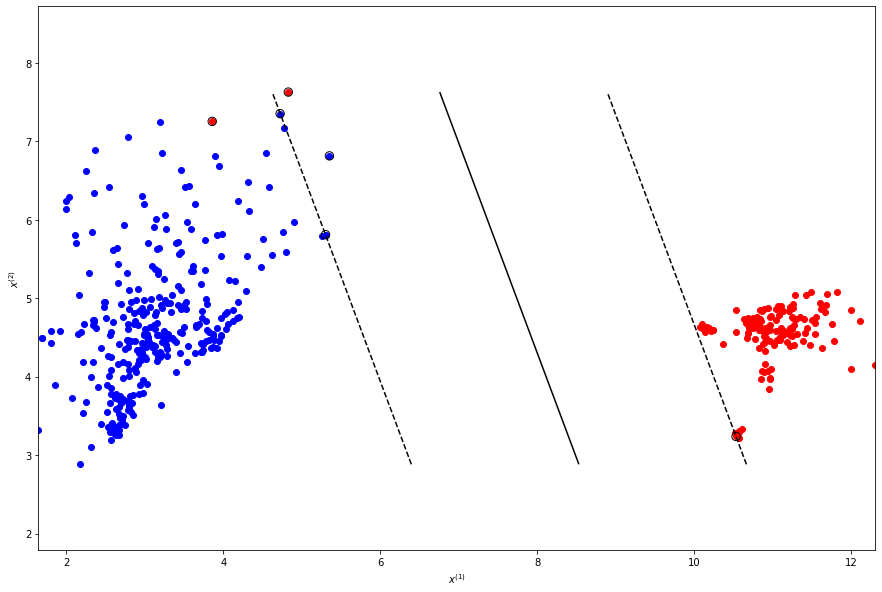

In [19]:
x_1_min = np.min(X[:, 0])
x_1_max = np.max(X[:, 0])
x_2_min = np.min(X[:, 1])
x_2_max = np.max(X[:, 1])

x_1_grid, x_2_grid = np.meshgrid(np.linspace(x_1_min,x_1_max,200),np.linspace(x_2_min,x_2_max,200))
f = svm_slin.decision_function(np.hstack((x_1_grid.reshape(-1,1),x_2_grid.reshape(-1,1))))

# Put the result into a color plot
matplotlib.rcParams['figure.figsize'] = [15, 10]
f = f.reshape(np.shape(x_1_grid))
plt.contour(x_1_grid, x_2_grid, f,colors=['k','k','k'],levels=[-1,0,1],linestyles=['--','-','--']);
plt.scatter(X[np.ravel(y==0),0],X[np.ravel(y==0),1],c='r',zorder=-1);
plt.scatter(X[np.ravel(y==1),0],X[np.ravel(y==1),1],c='b',zorder=-1);
plt.scatter(svm_slin.support_vectors_[:,0],svm_slin.support_vectors_[:,1],s=70,facecolors='none',edgecolors='k');
plt.xlabel('$x^{(1)}$');
plt.ylabel('$x^{(2)}$');
plt.gca().set_aspect('equal', 'datalim')

### 4. Effect of $C$ in soft margin linear SVM

A yet more difficult case is telling `CD4 T cells` and `CD8 T cells` apart. Repeat the steps for this pair and allow yourself to change the magnitude of the `C` parameter. What do you observe?

Accuracy of hard margin linear SVM: 93.4931506849315%


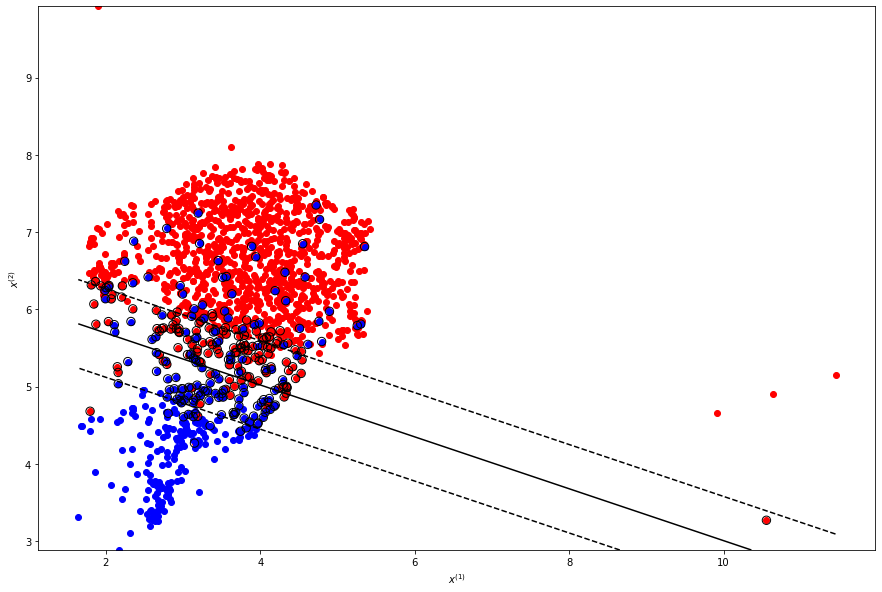

In [20]:
il_0 = df[df.louvain == 'CD4 T cells'].index
il_1 = df[df.louvain == 'CD8 T cells'].index
X_0 = np.array(embedding[il_0, :])
X_1 = np.array(embedding[il_1, :])
y_0 = np.array([0]*len(il_0)).reshape(-1,1)
y_1 = np.array([1]*len(il_1)).reshape(-1,1)
y = np.vstack((y_0[:],y_1[:]))
X = np.vstack((X_0,X_1))

svm_hlin = svm.SVC(kernel='linear',C=1e4)

svm_hlin.fit(X, np.ravel(y))
y_pred_svm=svm_hlin.predict(X)
from sklearn.metrics import accuracy_score
acc_svm_hlin = accuracy_score(y,y_pred_svm)
print('Accuracy of hard margin linear SVM: {}%'.format(acc_svm_hlin*100))

x_1_min = np.min(X[:, 0])
x_1_max = np.max(X[:, 0])
x_2_min = np.min(X[:, 1])
x_2_max = np.max(X[:, 1])

x_1_grid, x_2_grid = np.meshgrid(np.linspace(x_1_min,x_1_max,200),np.linspace(x_2_min,x_2_max,200))
f = svm_hlin.decision_function(np.hstack((x_1_grid.reshape(-1,1),x_2_grid.reshape(-1,1))))

# Put the result into a color plot
matplotlib.rcParams['figure.figsize'] = [15, 10]
f = f.reshape(np.shape(x_1_grid))
plt.contour(x_1_grid, x_2_grid, f,colors=['k','k','k'],levels=[-1,0,1],linestyles=['--','-','--']);
plt.scatter(X[np.ravel(y==0),0],X[np.ravel(y==0),1],c='r',zorder=-1);
plt.scatter(X[np.ravel(y==1),0],X[np.ravel(y==1),1],c='b',zorder=-1);
plt.scatter(svm_hlin.support_vectors_[:,0],svm_hlin.support_vectors_[:,1],s=70,facecolors='none',edgecolors='k');
plt.xlabel('$x^{(1)}$');
plt.ylabel('$x^{(2)}$');
plt.gca().set_aspect('equal', 'datalim')

Overall, as $C$ increases the margin reduces and the accuracy increases.

### 5. Kernel (soft margin) SVM

We now consider the full dataset and we want to have a good predictor for discriminating `CD8 T cells` from *any* other cell type. We soon realize no linear threshold is going to work in this case: we need a nonlinear approach.

For this, we will use a *kernel SVM*. Let's stack in the input matrix the `CD8 T cells` and `non-CD8 T cells` classes, change the kernel of the method to `rbf` and repeat the usual steps. The interesting parameters are now two: $C$ and $\gamma$. Test different values of $\gamma$: what happens? Which one gives the best accuracy? Which one gives the most appropriate model?

Accuracy of hard margin linear SVM: 95.4510993176649%


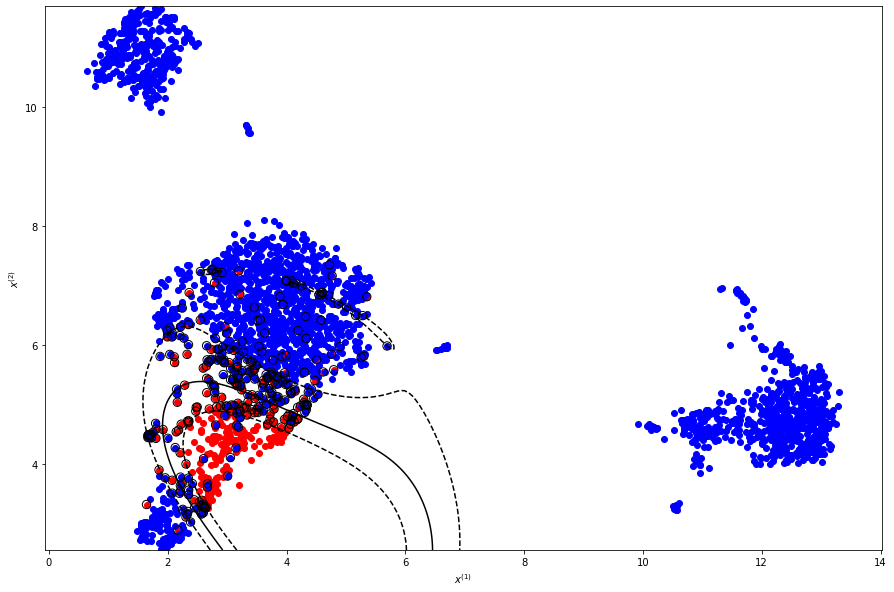

In [21]:
il_0 = df[df.louvain == 'CD8 T cells'].index
il_1 = df[df.louvain != 'CD8 T cells'].index
X_0 = np.array(embedding[il_0, :])
X_1 = np.array(embedding[il_1, :])
y_0 = np.array([0]*len(il_0)).reshape(-1,1)
y_1 = np.array([1]*len(il_1)).reshape(-1,1)
y = np.vstack((y_0[:],y_1[:]))
X = np.vstack((X_0,X_1))

svm_hlin = svm.SVC(kernel='rbf',C=1e2,gamma=1e-1)

svm_hlin.fit(X, np.ravel(y))
y_pred_svm=svm_hlin.predict(X)
from sklearn.metrics import accuracy_score
acc_svm_hlin = accuracy_score(y,y_pred_svm)
print('Accuracy of hard margin linear SVM: {}%'.format(acc_svm_hlin*100))

x_1_min = np.min(X[:, 0])
x_1_max = np.max(X[:, 0])
x_2_min = np.min(X[:, 1])
x_2_max = np.max(X[:, 1])

x_1_grid, x_2_grid = np.meshgrid(np.linspace(x_1_min,x_1_max,200),np.linspace(x_2_min,x_2_max,200))
f = svm_hlin.decision_function(np.hstack((x_1_grid.reshape(-1,1),x_2_grid.reshape(-1,1))))

# Put the result into a color plot
matplotlib.rcParams['figure.figsize'] = [15, 10]
f = f.reshape(np.shape(x_1_grid))
plt.contour(x_1_grid, x_2_grid, f,colors=['k','k','k'],levels=[-1,0,1],linestyles=['--','-','--']);
plt.scatter(X[np.ravel(y==0),0],X[np.ravel(y==0),1],c='r',zorder=-1);
plt.scatter(X[np.ravel(y==1),0],X[np.ravel(y==1),1],c='b',zorder=-1);
plt.scatter(svm_hlin.support_vectors_[:,0],svm_hlin.support_vectors_[:,1],s=70,facecolors='none',edgecolors='k');
plt.xlabel('$x^{(1)}$');
plt.ylabel('$x^{(2)}$');
plt.gca().set_aspect('equal', 'datalim')

## B. Multi-class classification

### 1. Application of one vs. one and one vs. rest multi-class classification of three different clusters. Linear SVM

Let's now work with more than two clusters and try to correctly classify three types of cells that appear as contiguous point clouds in our 2D embedding space: `CD4 T cells`, `CD8 T cells`, and `NK cells`. Stack the feature matrices in $\mathbf{X}$ and outputs in $\mathbf{y}$.

In [22]:
['CD8 T cells', 'B cells', 'Dendritic cells', 'Megakaryocytes', 'CD14+ Monocytes', 'FCGR3A+ Monocytes', 'NK cells', 'CD4 T cells']
il_0 = df[df.louvain == 'CD4 T cells'].index
il_1 = df[df.louvain == 'CD8 T cells'].index
il_2 = df[df.louvain == 'NK cells'].index
X_0 = np.array(embedding[il_0, :])
X_1 = np.array(embedding[il_1, :])
X_2 = np.array(embedding[il_2, :])
y_0 = np.array([0]*len(il_0)).reshape(-1,1)
y_1 = np.array([1]*len(il_1)).reshape(-1,1)
y_2 = np.array([2]*len(il_2)).reshape(-1,1)
y = np.vstack((y_0,y_1,y_2))
X = np.vstack((X_0,X_1,X_2))
print(y_0.shape, y_1.shape, y_2.shape)

(1144, 1) (316, 1) (154, 1)


Data visualization

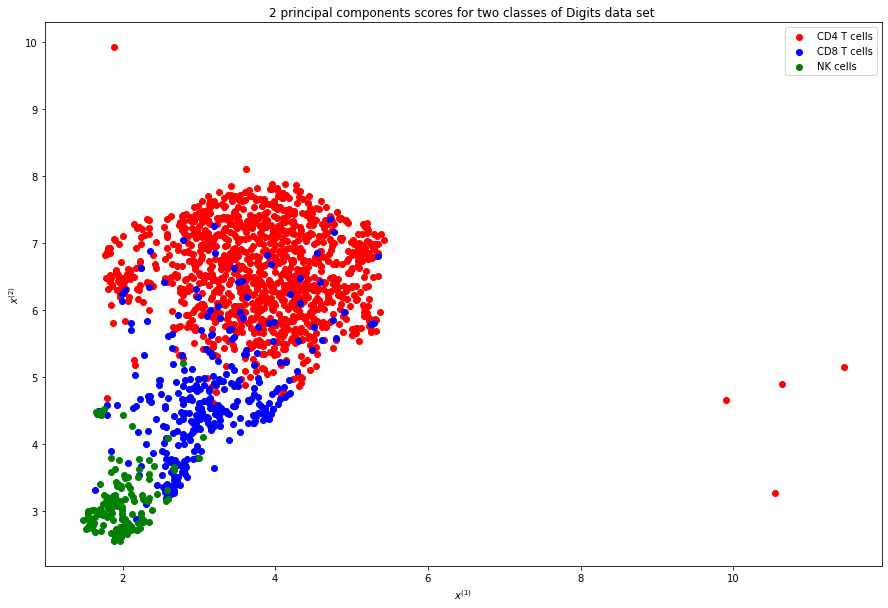

In [23]:
plt.scatter(X[np.ravel(y==0),0],X[np.ravel(y==0),1],c='r',label='CD4 T cells');
plt.scatter(X[np.ravel(y==1),0],X[np.ravel(y==1),1],c='b',label='CD8 T cells');
plt.scatter(X[np.ravel(y==2),0],X[np.ravel(y==2),1],c='g',label='NK cells');
plt.xlabel('$x^{(1)}$')
plt.ylabel('$x^{(2)}$');
plt.title('2 principal components scores for two classes of Digits data set ')
plt.legend();

We will test one vs. one (OVO) and one vs. rest (OVR) strategies using a soft margin linear SVM for the underlying binary classification. Look into `sklearn` documentation to see how to apply these strategies with SVM. For the binary soft SVM classifier you can use parameter value `C = 1`.
Evaluate the accuracy of both strategies and draw with different colors the corresponding predicted classes regions behind a scatterplot of the data. To draw the different predicted classes regions as different background colors you can use the function `pcolormesh` from `matplotlib.pyplot`, in a similar way you've already done in the previous labworks.
Is there a difference in performance between the strategies? Why?

### One vs. one linear SVM classifier

Import the one vs. one classifier and set up the correct parameters

In [24]:
from sklearn.multiclass import OneVsOneClassifier
svm_mclass = OneVsOneClassifier(svm.SVC(kernel='linear',C=1e0))

Fit on training data, evaluate the corresponding predictions, calculate and print the accuracy 

In [25]:
svm_mclass.fit(X, np.ravel(y))
y_pred_svm=svm_mclass.predict(X)
from sklearn.metrics import accuracy_score
acc_svm_mclass = accuracy_score(y,y_pred_svm)
print('Accuracy of hard margin linear SVM: {}%'.format(acc_svm_mclass*100))

Accuracy of hard margin linear SVM: 92.37918215613384%


Plot the predicted class regions

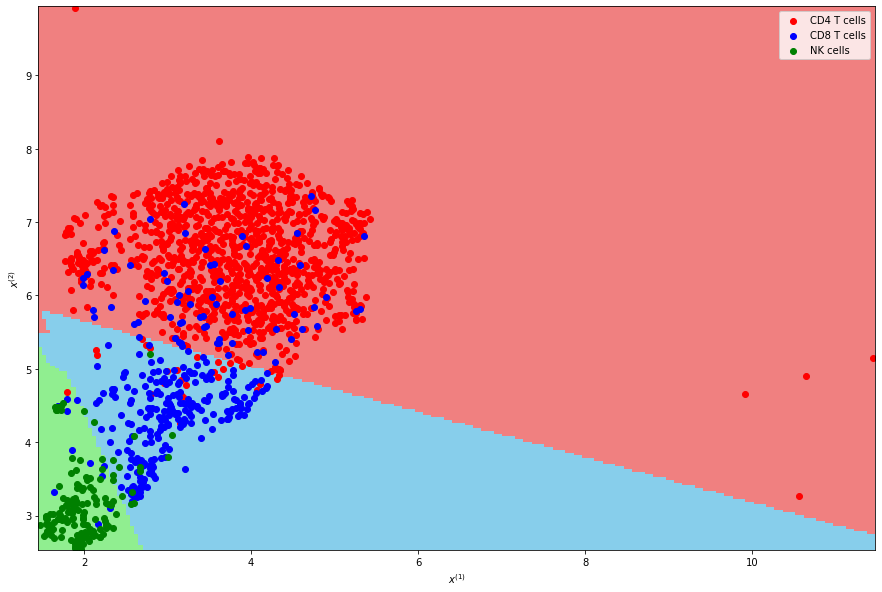

In [26]:
x_1_min = np.min(X[:, 0])
x_1_max = np.max(X[:, 0])
x_2_min = np.min(X[:, 1])
x_2_max = np.max(X[:, 1])

x_1_grid, x_2_grid = np.meshgrid(np.linspace(x_1_min,x_1_max,200),np.linspace(x_2_min,x_2_max,200))

labels = svm_mclass.predict(np.hstack((x_1_grid.reshape(-1,1),x_2_grid.reshape(-1,1))))


# Put the result into a color plot
labels = labels.reshape(np.shape(x_1_grid))
from matplotlib import colors
cmap_cust = colors.ListedColormap(['lightcoral','skyblue','lightgreen'],N=3)
print(cmap_cust)
bounds = [0.5,1, 1.5, 2.5]
norm = colors.BoundaryNorm(bounds, cmap_cust.N)
matplotlib.rcParams['pcolor.shading'] = 'auto'
plt.pcolormesh(x_1_grid, x_2_grid, labels, cmap=cmap_cust,norm=norm)

plt.scatter(X[np.ravel(y==0),0],X[np.ravel(y==0),1],c='r',label='CD4 T cells');
plt.scatter(X[np.ravel(y==1),0],X[np.ravel(y==1),1],c='b',label='CD8 T cells');
plt.scatter(X[np.ravel(y==2),0],X[np.ravel(y==2),1],c='g',label='NK cells');
plt.xlabel('$x^{(1)}$');
plt.ylabel('$x^{(2)}$');
plt.legend();

### One vs. rest linear SVM classifier

Repeat the same steps with the OVR classifier

Accuracy of hard margin linear SVM: 88.35192069392814%


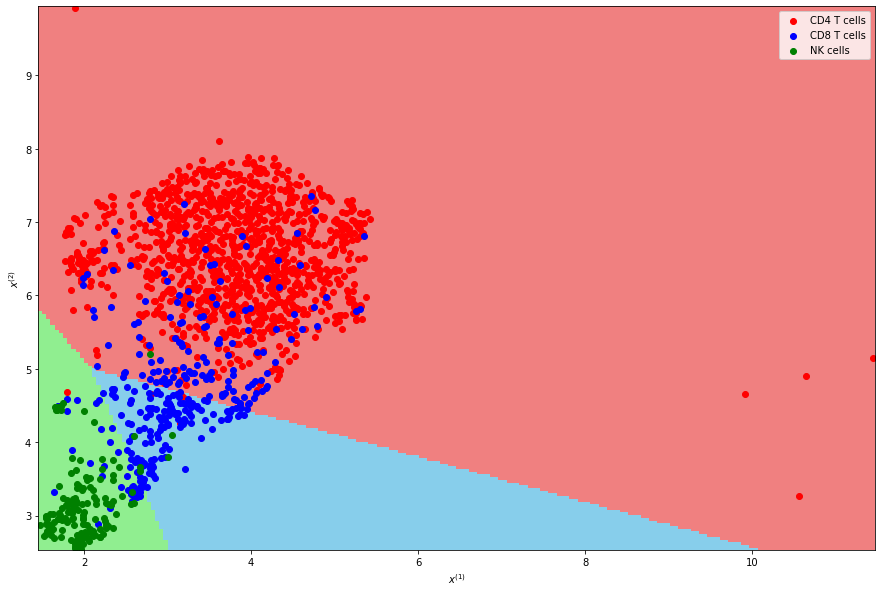

In [27]:
from sklearn.multiclass import OneVsRestClassifier
svm_mclass = OneVsRestClassifier(svm.SVC(kernel='linear',C=1e0))

svm_mclass.fit(X, np.ravel(y))
y_pred_svm=svm_mclass.predict(X)
from sklearn.metrics import accuracy_score
acc_svm_mclass = accuracy_score(y,y_pred_svm)
print('Accuracy of hard margin linear SVM: {}%'.format(acc_svm_mclass*100))

x_1_min = np.min(X[:, 0])
x_1_max = np.max(X[:, 0])
x_2_min = np.min(X[:, 1])
x_2_max = np.max(X[:, 1])

x_1_grid, x_2_grid = np.meshgrid(np.linspace(x_1_min,x_1_max,200),np.linspace(x_2_min,x_2_max,200))

labels = svm_mclass.predict(np.hstack((x_1_grid.reshape(-1,1),x_2_grid.reshape(-1,1))))


# Put the result into a color plot
labels = labels.reshape(np.shape(x_1_grid))
from matplotlib import colors
cmap_cust = colors.ListedColormap(['lightcoral','skyblue','lightgreen'],N=3)
print(cmap_cust)
bounds = [0.5,1, 1.5, 2.5]
norm = colors.BoundaryNorm(bounds, cmap_cust.N)
matplotlib.rcParams['pcolor.shading'] = 'auto'
plt.pcolormesh(x_1_grid, x_2_grid, labels, cmap=cmap_cust,norm=norm)

plt.scatter(X[np.ravel(y==0),0],X[np.ravel(y==0),1],c='r',label='CD4 T cells');
plt.scatter(X[np.ravel(y==1),0],X[np.ravel(y==1),1],c='b',label='CD8 T cells');
plt.scatter(X[np.ravel(y==2),0],X[np.ravel(y==2),1],c='g',label='NK cells');
plt.xlabel('$x^{(1)}$');
plt.ylabel('$x^{(2)}$');
plt.legend();

OVO strategy has the best performance. For the OVR strategy to work well with a linear classifier, each class has 
to be linearly separable from the union of the other classes. This is not the case here for the observations `CD8 T cells`.

### 2. Application of one vs. one and one vs. rest multi-class classification. Kernel SVM

Let's repeat the analysis, this time with a kernel SVM. Is there any noticeable difference?

### One vs. one linear SVM classifier

Accuracy of hard margin linear SVM: 92.50309789343247%


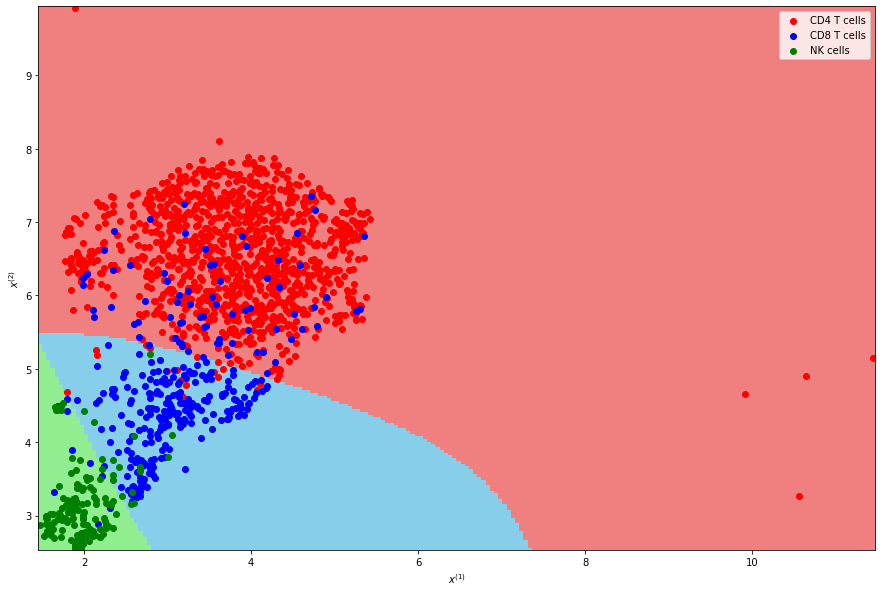

In [28]:
svm_mclass = OneVsOneClassifier(svm.SVC(kernel='rbf',C=1e0,gamma=1e-1))

svm_mclass.fit(X, np.ravel(y))
y_pred_svm=svm_mclass.predict(X)
from sklearn.metrics import accuracy_score
acc_svm_mclass = accuracy_score(y,y_pred_svm)
print('Accuracy of hard margin linear SVM: {}%'.format(acc_svm_mclass*100))

x_1_min = np.min(X[:, 0])
x_1_max = np.max(X[:, 0])
x_2_min = np.min(X[:, 1])
x_2_max = np.max(X[:, 1])

x_1_grid, x_2_grid = np.meshgrid(np.linspace(x_1_min,x_1_max,200),np.linspace(x_2_min,x_2_max,200))

labels = svm_mclass.predict(np.hstack((x_1_grid.reshape(-1,1),x_2_grid.reshape(-1,1))))


# Put the result into a color plot
labels = labels.reshape(np.shape(x_1_grid))
from matplotlib import colors
cmap_cust = colors.ListedColormap(['lightcoral','skyblue','lightgreen'],N=3)
print(cmap_cust)
bounds = [0.5,1, 1.5, 2.5]
norm = colors.BoundaryNorm(bounds, cmap_cust.N)
matplotlib.rcParams['pcolor.shading'] = 'auto'
plt.pcolormesh(x_1_grid, x_2_grid, labels, cmap=cmap_cust,norm=norm)

plt.scatter(X[np.ravel(y==0),0],X[np.ravel(y==0),1],c='r',label='CD4 T cells');
plt.scatter(X[np.ravel(y==1),0],X[np.ravel(y==1),1],c='b',label='CD8 T cells');
plt.scatter(X[np.ravel(y==2),0],X[np.ravel(y==2),1],c='g',label='NK cells');
plt.xlabel('$x^{(1)}$');
plt.ylabel('$x^{(2)}$');
plt.legend();

### One vs. rest linear SVM classifier

Accuracy of hard margin linear SVM: 92.3172242874845%


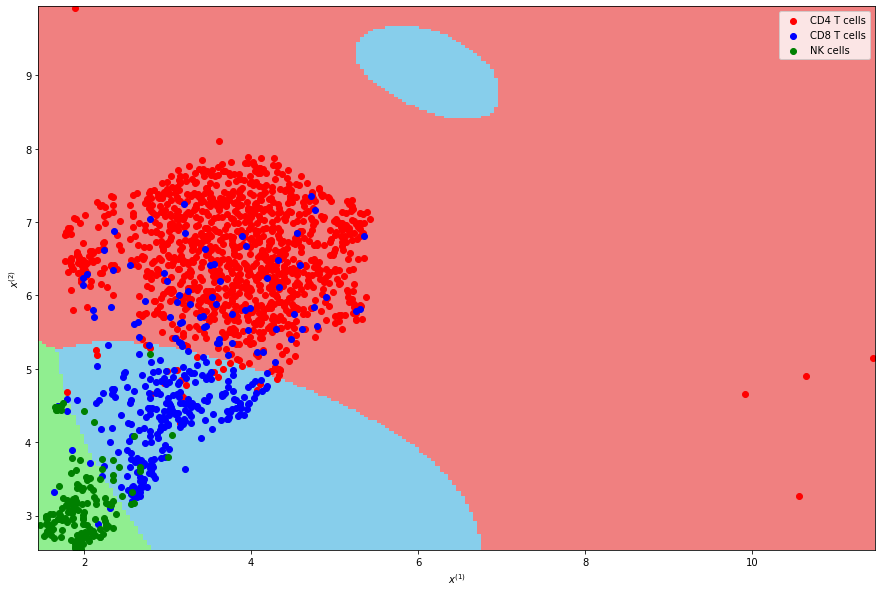

In [29]:
svm_mclass = OneVsRestClassifier(svm.SVC(kernel='rbf',C=1e0,gamma=1e-1))

svm_mclass.fit(X, np.ravel(y))
y_pred_svm=svm_mclass.predict(X)
from sklearn.metrics import accuracy_score
acc_svm_mclass = accuracy_score(y,y_pred_svm)
print('Accuracy of hard margin linear SVM: {}%'.format(acc_svm_mclass*100))

x_1_min = np.min(X[:, 0])
x_1_max = np.max(X[:, 0])
x_2_min = np.min(X[:, 1])
x_2_max = np.max(X[:, 1])

x_1_grid, x_2_grid = np.meshgrid(np.linspace(x_1_min,x_1_max,200),np.linspace(x_2_min,x_2_max,200))

labels = svm_mclass.predict(np.hstack((x_1_grid.reshape(-1,1),x_2_grid.reshape(-1,1))))


# Put the result into a color plot
labels = labels.reshape(np.shape(x_1_grid))
from matplotlib import colors
cmap_cust = colors.ListedColormap(['lightcoral','skyblue','lightgreen'],N=3)
print(cmap_cust)
bounds = [0.5,1, 1.5, 2.5]
norm = colors.BoundaryNorm(bounds, cmap_cust.N)
matplotlib.rcParams['pcolor.shading'] = 'auto'
plt.pcolormesh(x_1_grid, x_2_grid, labels, cmap=cmap_cust,norm=norm)

plt.scatter(X[np.ravel(y==0),0],X[np.ravel(y==0),1],c='r',label='CD4 T cells');
plt.scatter(X[np.ravel(y==1),0],X[np.ravel(y==1),1],c='b',label='CD8 T cells');
plt.scatter(X[np.ravel(y==2),0],X[np.ravel(y==2),1],c='g',label='NK cells');
plt.xlabel('$x^{(1)}$');
plt.ylabel('$x^{(2)}$');
plt.legend();

There is no significant difference in performance between the two strategies.

In this case, the observations of `CD8 T cells` can be easily separated from the observations of the union of the two other classes with a non linear classifier, therefore the OVR strategy does not suffer from the issue observed for the linear classifiers.

Accuracy of hard margin linear SVM: 93.5557240333586%


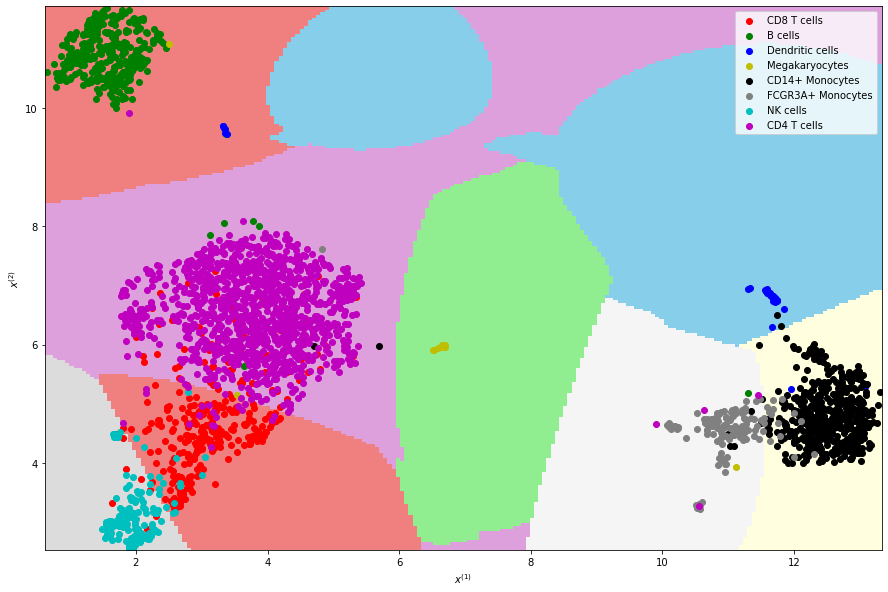

In [30]:
types = ['CD8 T cells', 'B cells', 'Dendritic cells', 'Megakaryocytes', 'CD14+ Monocytes', 'FCGR3A+ Monocytes', 'NK cells', 'CD4 T cells']
colorz = ['r', 'g', 'b', 'y', 'k', '0.5', 'c', 'm']
shades = ['lightcoral','skyblue','lightgreen', 'lightyellow', 'whitesmoke', 'gainsboro', 'lightcyan', 'plum']
ill, Xl, yl = [], [], []
for i,t in enumerate(types):
    ill.append(df[df.louvain == t].index)
    Xl.append(np.array(embedding[ill[-1], :]))
    yl.append(np.array([i]*len(ill[-1])).reshape(-1,1))
y = np.vstack(yl)
X = np.vstack(Xl)

svm_mclass = OneVsOneClassifier(svm.SVC(kernel='rbf',C=1e0,gamma=1e-1))

svm_mclass.fit(X, np.ravel(y))
y_pred_svm=svm_mclass.predict(X)
acc_svm_mclass = accuracy_score(y,y_pred_svm)
print('Accuracy of hard margin linear SVM: {}%'.format(acc_svm_mclass*100))

x_1_min = np.min(X[:, 0])
x_1_max = np.max(X[:, 0])
x_2_min = np.min(X[:, 1])
x_2_max = np.max(X[:, 1])

x_1_grid, x_2_grid = np.meshgrid(np.linspace(x_1_min,x_1_max,200),np.linspace(x_2_min,x_2_max,200))

labels = svm_mclass.predict(np.hstack((x_1_grid.reshape(-1,1),x_2_grid.reshape(-1,1))))


# Put the result into a color plot
labels = labels.reshape(np.shape(x_1_grid))
from matplotlib import colors
cmap_cust = colors.ListedColormap(shades,N=len(types))
print(cmap_cust)
bounds = [i+0.5 for i in range(len(types))]
norm = colors.BoundaryNorm(bounds, cmap_cust.N)
matplotlib.rcParams['pcolor.shading'] = 'auto'
plt.pcolormesh(x_1_grid, x_2_grid, labels, cmap=cmap_cust,norm=norm)

for i in range(len(types)):
    plt.scatter(X[np.ravel(y==i),0],X[np.ravel(y==i),1],c=colorz[i],label=types[i])
plt.xlabel('$x^{(1)}$');
plt.ylabel('$x^{(2)}$');
plt.legend();